In [1]:
import math
import matplotlib
import numpy as np
from scipy import stats
from scipy.stats import lognorm
import matplotlib.pyplot as plt

%matplotlib inline

3.28571428571 2.48979591837
3.28571428571 2.48979591837
[ 4.  2.  4.  2.  4.  4.  5.]
3.57142857143 1.10204081633


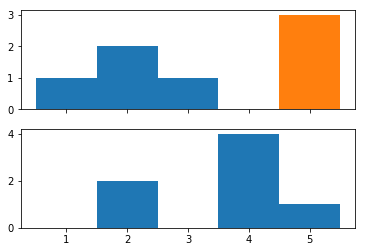

In [2]:
x = [1, 2, 2, 3]
Nx = len(x)
mx = np.average(x)
sx = np.sqrt(np.var(x))
y = [5, 5, 5]
Ny = len(y)
my = np.average(y)
sy = np.sqrt(np.var(y))

z = np.append(x,y)
N = Nx + Ny
m = (Nx*mx + Ny*my)/N
s = np.sqrt((Nx*sx*sx + Ny*sy*sy + Nx*Ny*(mx-my)**2/(Nx+Ny))/(Nx+Ny))

print np.average(z), np.var(z)
print m, s**2

np.random.seed(19250430)
z2 = np.round(m + s*np.random.randn(N))
print z2
print np.average(z2), np.var(z2)

f, plts = plt.subplots(2, sharex=True)
plts[0].hist(x, bins=5, range=(0.5,5.5));
plts[0].hist(y, bins=5, range=(0.5,5.5));
plts[1].hist(z2, bins=5, range=(0.5,5.5));

20.9521116212 5.68932986633
20.9279813835 5.64601877296
11.7707212436 29.7197148974


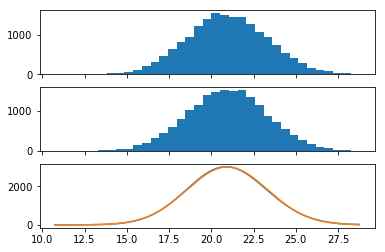

In [19]:
np.random.seed(19250430)

x = np.linspace(10.75, 28.75, num=1000)

# First set of random numbers
Na = 10000
ma = 20.5
sa = np.sqrt(5)
a = ma + sa*np.random.randn(Na)
pdf_a = stats.norm.pdf(x,ma,sa)

# Second set of random numbers
Nb = 8000
mb = 21.5
sb = np.sqrt(6)
b = mb + sb*np.random.randn(Nb)
pdf_b = stats.norm.pdf(x,mb,sb)

# Combine them
ctmp = np.append(a,b)
Nc = Na + Nb
mc = (Na*ma + Nb*mb)/Nc
sc = np.sqrt((Na*sa*sa + Nb*sb*sb + Na*Nb*(ma-mb)**2/(Na+Nb))/(Na+Nb))
c = mc + sc*np.random.randn(Nc)
pdf_c = stats.norm.pdf(x,mc,sc)

print np.average(ctmp), np.var(ctmp)
print np.average(c), np.var(c)
print np.min(c), np.max(c)

f, plts = plt.subplots(3, sharex=True)
orig = plts[0].hist(ctmp, bins=35, range=(10.75,28.75))
new = plts[1].hist(c, bins=35, range=(10.75,28.75))
plts[2].plot(x, Na*pdf_a + Nb*pdf_b)
plts[2].plot(x, Nc*pdf_c)
#plts[1].hist(z2, bins=5, range=(1,6));

In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)
print np.average(x), np.var(x)
print mu, sigma**2

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

plt.show()

In [ ]:
# gaussian distribution
# loc = mean, scale = standard deviation
n_pdfs = 10
n_x = 1000

mean = np.linspace(0, 5, num=n_pdfs)
stdev = np.linspace(0.1, 1.5, num=n_pdfs)

# compare distributions of random numbers vs. a pdf
# random numbers
rand_norm = np.zeros((n_x, n_pdfs))
for i in range(n_pdfs):
    rand_norm[:,i] = stats.norm.rvs(mean[i], stdev[i], n_x)

f, axarr = plt.subplots(n_pdfs, sharex=True, figsize=(5,n_pdfs))
for i in range(n_pdfs):
    axarr[i].hist(rand_norm[:,i], 50)


In [ ]:
# gaussian probability distribution function
x = np.linspace(-2, 12, num=n_x)

pdfs_norm = np.zeros((n_x, n_pdfs)) # initialize

for i in range(n_pdfs):
    pdfs_norm[:,i] = stats.norm.pdf(x, loc=mean[i], scale=stdev[i])

# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(n_pdfs, sharex=True, figsize=(5,n_pdfs))
for i in range(n_pdfs):
    axarr[i].plot(x, pdfs_norm[:,i])

In [ ]:
x = np.linspace(-2, 20, num=n_x)

mu1, sigma1 = 10, 2
mu2, sigma2 = 5, 1

pdf_norm1 = stats.norm.pdf(x, loc=mu1, scale=sigma1)
pdf_norm2 = stats.norm.pdf(x, loc=mu2, scale=sigma2)

rvs_norm1 = stats.norm.rvs(mu1, sigma1, n_x*100)
rvs_norm2 = stats.norm.rvs(mu2, sigma2, n_x*100)

f, axarr = plt.subplots(4, sharex=True, figsize=(5,5))
axarr[0].plot(x, pdf_norm1)
n1, bins1, patches1 = axarr[1].hist(rvs_norm1, 50, normed=1)
axarr[2].plot(x, pdf_norm2)
n2, bins2, patches2 = axarr[3].hist(rvs_norm2, 50, normed=1)

In [ ]:
rvs_norm = np.append(rvs_norm1, rvs_norm2)
n, bins, patches = plt.hist(rvs_norm, 50, normed=1)

In [ ]:
print(np.sum(np.diff(bins) * n)) # sums up to equal 1

In [ ]:
# distribution 1
n1prime = np.gradient(n1) # first derivative
n1primeprime = np.gradient(n1prime) # second derivative

f1, ax1 = plt.subplots(3, sharex=True)
ax1[0].plot(n1)
ax1[1].plot(n1prime) 
ax1[2].plot(n1primeprime) 

# distribution 2
n2prime = np.gradient(n2) # first derivative
n2primeprime = np.gradient(n2prime) # second derivative

f2, ax2 = plt.subplots(3, sharex=True)
ax2[0].plot(n2)
ax2[1].plot(n2prime) 
ax2[2].plot(n2primeprime) 

In [ ]:
# combined
nprime = np.gradient(n) # first derivative
nprimeprime = np.gradient(nprime) # second derivative

f, ax = plt.subplots(3, sharex=True)
ax[0].plot(n)
ax[1].plot(nprime) 
ax[2].plot(nprimeprime) 

In [ ]:
def hessian(x):
    """
    Calculate the hessian matrix with finite differences
    Parameters:
       - x : ndarray
    Returns:
       an array of shape (x.dim, x.ndim) + x.shape
       where the array[i, j, ...] corresponds to the second derivative x_ij
    """
    x_grad = np.gradient(x) 
    hessian = np.empty((x.ndim, x.ndim) + x.shape, dtype=x.dtype) 
    for k, grad_k in enumerate(x_grad):
        # iterate over dimensions
        # apply gradient again to every component of the first derivative.
        tmp_grad = np.gradient(grad_k) 
        for l, grad_kl in enumerate(tmp_grad):
            hessian[k, l, :, :] = grad_kl
    return hessian

In [ ]:
# log normal distribution
# single value simulation

M = float(1) # geometric mean
s = float(2) # geometric standard deviation
mu = np.log(M)
sigma = np.log(s)

# shape = sigma # scipy's shape (s) parameter, needs to be > 0 
# scale = np.exp(mu) # scipy's scale parameter

x = np.linspace(0.1, 20, num=100)

pdf_lnorm = lognorm.pdf(x, sigma, loc=0, scale=np.exp(mu))

plt.plot(x, pdf_lnorm)
plt.show()

In [ ]:
# series of values
n_pdfs = 20
n_x = 1000

mu = np.linspace(0, 3, num=n_pdfs)
sigma = np.linspace(0.1, 2.5, num=n_pdfs)

# shape = sigma # scipy's shape (s) parameter, needs to be > 0 
# scale = np.exp(mu) # scipy's scale parameter

x = np.linspace(0.1, 30, num=n_x)

pdfs_lnorm = np.zeros((n_x, n_pdfs)) # initialize

for i in range(n_pdfs):
    pdfs_lnorm[:,i] = lognorm.pdf(x, sigma[i], loc=0, scale=np.exp(mu[i]))

# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(n_pdfs, sharex=True, figsize=(5,n_pdfs))
for i in range(n_pdfs):
    axarr[i].plot(x, pdfs_lnorm[:,i])
